In [21]:
import pandas as pd
import numpy as np

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("dataset/train.csv")

In [24]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

In [25]:
X.shape

(2000, 20)

In [26]:
y.shape

(2000,)

In [27]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.decomposition import PCA

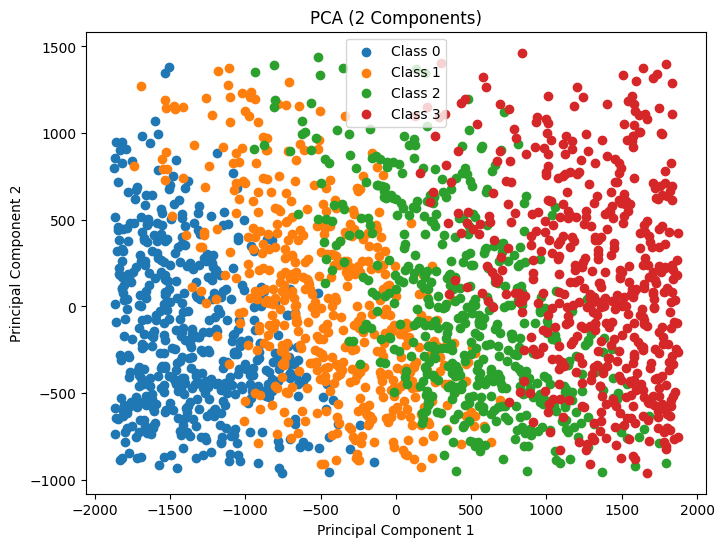

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))

for label in sorted(df.price_range.unique()):
    plt.scatter(
        X_pca[y==label, 0], 
        X_pca[y==label, 1], 
        label=f"Class {label}"
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA (2 Components)')
plt.legend()
plt.show()


In [34]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train_scaled, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [ ]:
train_pred = grid.best_estimator_.predict(X_train_scaled)
test_pred = grid.best_estimator_.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


In [ ]:
svm_clf = SVC(
    kernel="rbf",
    C=10,           
    gamma="scale",  
    random_state=42 
)

In [ ]:
svm_clf.fit(X_train_scaled, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred = svm_clf.predict(X_test_scaled)

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.89

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.94      0.94       100\n           1       0.85      0.81      0.83       100\n           2       0.83      0.87      0.85       100\n           3       0.95      0.94      0.94       100\n\n    accuracy                           0.89       400\n   macro avg       0.89      0.89      0.89       400\nweighted avg       0.89      0.89      0.89       400\n'

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94,  6,  0,  0],
       [ 7, 81, 12,  0],
       [ 0,  8, 87,  5],
       [ 0,  0,  6, 94]])

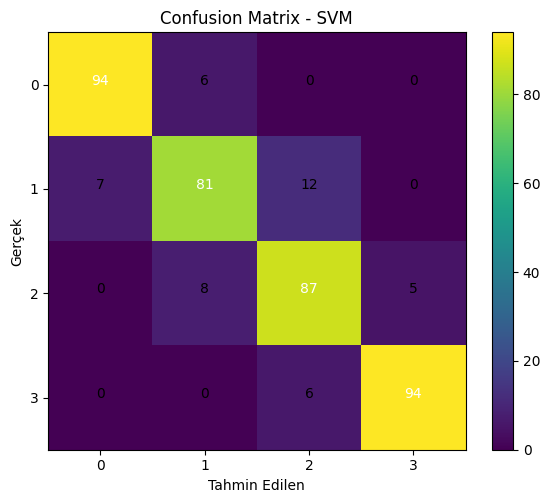

In [ ]:
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix - SVM")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.tight_layout()
plt.show()